In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import calendar

/home/msharath/anaconda/lib/python2.7/site-packages/matplotlib-1.5.0+439.g05cf385-py2.7-linux-i686.egg/matplotlib/__init__.py:877: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
mkdir -p viz

In [3]:
df = pd.read_pickle('out/21/donations.pkl')
events = pd.read_pickle('out/41/events.pkl')

In [4]:
df.columns

Index([u'activity_date', u'city', u'fund', u'amount_initial',
       u'amount_cleanup', u'zipcode', u'longitude', u'sales', u'county',
       u'charitable', u'amount', u'state', u'donor_id', u'timezone',
       u'latitude', u'appeal', u'activity_year', u'activity_month',
       u'activity_dow', u'activity_ym', u'activity_yq', u'activity_ymd',
       u'county_norm', u'census_region_name', u'state_name', u'county_id',
       u'is_service', u'channel', u'campaign_location_id',
       u'is_location_center', u'campaign_month_id', u'is_month_center'],
      dtype='object')

In [5]:
df = df[['donor_id','activity_year', 'amount', 'is_service','channel', 'city','county','state','activity_date','activity_ym','activity_month','appeal','campaign_location_id','campaign_month_id']]

## Nomenclature:
    1. Donation - is a charitable contribution
    2. Contribution - is not a charitable contribution

In [6]:
def get_data(rows):
    '''
    input: rows from dataframe for a specific donor
    output: money donated and contributed over the years
    '''
    return rows\
    .groupby(['activity_year', 'activity_month', 'is_service', 'state'])\
    .agg({'amount': sum}).reset_index()

In [7]:
df[(df.donor_id=='_1D50SWTKX') & (df.activity_year == 2014)].reset_index()

,index,donor_id,activity_year,amount,is_service,channel,city,county,state,activity_date,activity_ym,activity_month,appeal,campaign_location_id,campaign_month_id
0,106932,_1D50SWTKX,2014,5000,False,Matching,Kenmore,King,WA,2014-02-28,201402,2,Funds_Matching,NaN,NaN
1,106933,_1D50SWTKX,2014,3500,False,Other,Kenmore,King,WA,2014-06-20,201406,6,Funds_SVGives,NaN,NaN
2,106934,_1D50SWTKX,2014,10,False,Other,Kenmore,King,WA,2014-06-20,201406,6,Funds_SVGives,NaN,NaN
3,106935,_1D50SWTKX,2014,50,False,Funds_Givingcampaign,Kenmore,King,WA,2014-08-13,201408,8,Funds_Givingcampaign,NaN,NaN
4,106936,_1D50SWTKX,2014,425,False,Volunteer,Kenmore,King,WA,2014-09-02,201409,9,Funds_Volunteer_Hours,NaN,NaN
5,106937,_1D50SWTKX,2014,3510,False,Other,Kenmore,King,WA,2014-09-02,201409,9,Funds_SVGives,NaN,NaN
6,106938,_1D50SWTKX,2014,50,False,Matching,Kenmore,King,WA,2014-12-08,201412,12,Funds_Matching,NaN,NaN


In [8]:
donor_data = df\
.groupby('donor_id')\
.apply(get_data)

donor_data.index = donor_data.index.droplevel(1)
donor_data = donor_data.reset_index()

In [9]:
year_of_donation = donor_data[(donor_data.is_service==False)]\
.groupby('donor_id')['activity_year']\
.rank(method='dense')

year_of_donation.name = 'year_of_donation'

year_of_contribution = donor_data[(donor_data.is_service==True)]\
.groupby('donor_id')['activity_year']\
.rank(method='dense')

year_of_contribution.name = 'year_of_contribution'

In [10]:
donor_data = pd.merge(donor_data, pd.DataFrame(year_of_donation), how='left', left_index=True, right_index=True)
donor_data = pd.merge(donor_data, pd.DataFrame(year_of_contribution), how='left', left_index=True, right_index=True)

In [11]:
# First forward fill the data and then replace with zeros if there are still any nulls lying around
donor_data.year_of_contribution = donor_data.year_of_contribution.fillna(method='ffill')
donor_data.year_of_donation = donor_data.year_of_donation.fillna(method='ffill')

donor_data.year_of_contribution = donor_data.year_of_contribution.fillna(0)
donor_data.year_of_donation = donor_data.year_of_donation.fillna(0)

In [12]:
donor_data[donor_data.donor_id=='_1D50SWTKX']

,donor_id,activity_year,activity_month,is_service,state,amount,year_of_donation,year_of_contribution
112343,_1D50SWTKX,2004,11,False,WA,500,1,1
112344,_1D50SWTKX,2005,2,False,WA,500,2,1
112345,_1D50SWTKX,2005,6,False,WA,540,2,1
112346,_1D50SWTKX,2005,9,False,WA,540,2,1
112347,_1D50SWTKX,2005,11,False,WA,540,2,1
112348,_1D50SWTKX,2005,12,False,WA,1137,2,1
112349,_1D50SWTKX,2006,3,False,WA,540,3,1
112350,_1D50SWTKX,2006,5,False,WA,1718,3,1
112351,_1D50SWTKX,2006,7,False,WA,459,3,1
112352,_1D50SWTKX,2006,8,False,WA,948,3,1


In [13]:
donor_data[donor_data['donor_id'] == '-0Q51CZR36']

,donor_id,activity_year,activity_month,is_service,state,amount,year_of_donation,year_of_contribution
0,-0Q51CZR36,2002,4,True,CA,100,0,1
1,-0Q51CZR36,2003,4,False,CA,100,1,1


In [14]:
def get_repeat_years(years):
    '''
    input: years of activity for donor
    output: list of boolean representing if the year was a repeat year donation
    '''
    #years = rows.activity_year.unique()
    repeat_years = [y for y in years.values if y-1 in years.values]
    return years.isin(repeat_years)

In [15]:
donor_data['is_repeat_year'] = donor_data[(donor_data.is_service==False)]\
    .groupby('donor_id')['activity_year']\
    .apply(get_repeat_years)

In [16]:
!mkdir -p out/42
donor_data.to_pickle('out/42/donors.pkl')

# Plots! Plots! Plots!

In [17]:
donor_data = pd.read_pickle('out/42/donors.pkl')
donations = df

In [18]:
import locale

In [19]:
color1 = '#67a9cf'
color2 = '#fc8d59'
colors = [color1, color2]

_ = locale.setlocale(locale.LC_ALL, '')
thousands_sep = lambda x: locale.format("%.2f", x, grouping=True)

### Do people tend to give more money along the years?

Calculate the amount donated in the Nth year of donation.

In [20]:
yearly_donors = donor_data[donor_data.is_service==True]\
.groupby(['year_of_donation', 'donor_id'])\
.amount.sum()\
.to_frame()

yearly_donors.index = yearly_donors.index.droplevel(1)
data = yearly_donors.reset_index().groupby('year_of_donation').amount.median().reset_index()

data.columns = ['year_of_donation', 'amount']

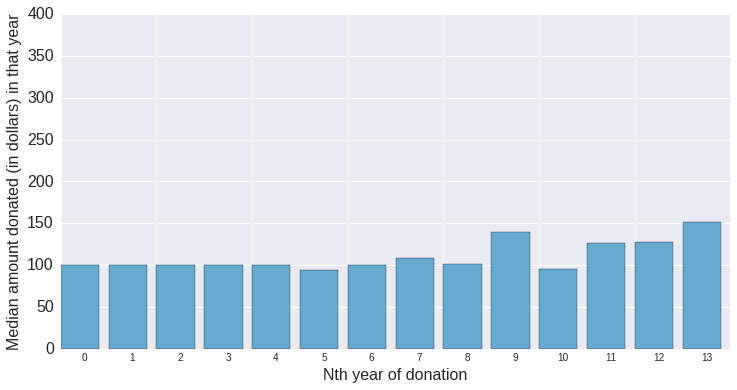

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
plt.bar(data[:-2].year_of_donation, data[:-2].amount, color=color1)
plt.xlabel('Nth year of donation', fontsize=16)
plt.ylabel('Median amount donated (in dollars) in that year', fontsize=16)
ax.xaxis.set_major_formatter(ticker.NullFormatter())

ax.set_ylim([0,400])

plt.tick_params(labelsize=16)
ax.xaxis.set_minor_locator(ticker.FixedLocator(data.index.values+0.5))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(data.index.values.astype('int')))
ax.tick_params(axis='x', labelsize=16)
#_ = fig.suptitle('Average amount donated vs year of donation', fontsize=16)
plt.savefig('viz/Median_Amount_Donated_In_Nth_Year.png')

### New donors vs repeat donors

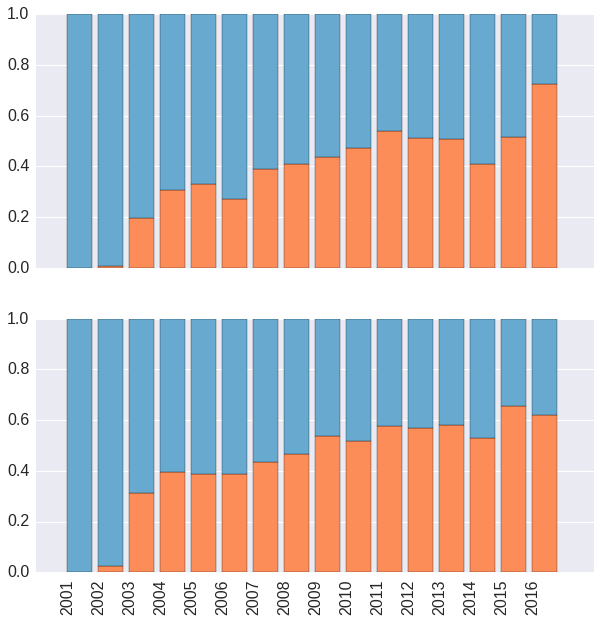

In [22]:
data1 = donor_data[(donor_data.is_service==False)].groupby(['activity_year', 'is_repeat_year']).donor_id.nunique().unstack().fillna(0)
data1 = pd.DataFrame(data1.values, columns=['New','Repeat'], index=np.sort(data1.index.unique()))
data1 = data1.apply(lambda x: x/x.sum(), axis=1)

data2 = donor_data[(donor_data.is_service==False)].groupby(['activity_year', 'is_repeat_year']).amount.sum().unstack().fillna(0)
data2 = pd.DataFrame(data2.values, columns=['New','Repeat'], index=np.sort(data2.index.unique()))
data2 = data2.apply(lambda x: x/x.sum(), axis=1)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,10))
ax1.bar(data1.index.values, data1.Repeat, color = color2)
ax1.bar(data1.index.values, data1.New, color = color1, bottom=data1.Repeat)
ax1.tick_params(labelsize=16)

ax2.bar(data2.index.values, data2.Repeat, color = color2)
ax2.bar(data2.index.values, data2.New, color = color1, bottom=data2.Repeat)
ax2.tick_params(labelsize=16)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.xticks(np.sort(donor_data.activity_year.unique()))

plt.savefig('viz/NewVsRepeatDonors.png')

### What proportion of money is coming in through various marketing channels

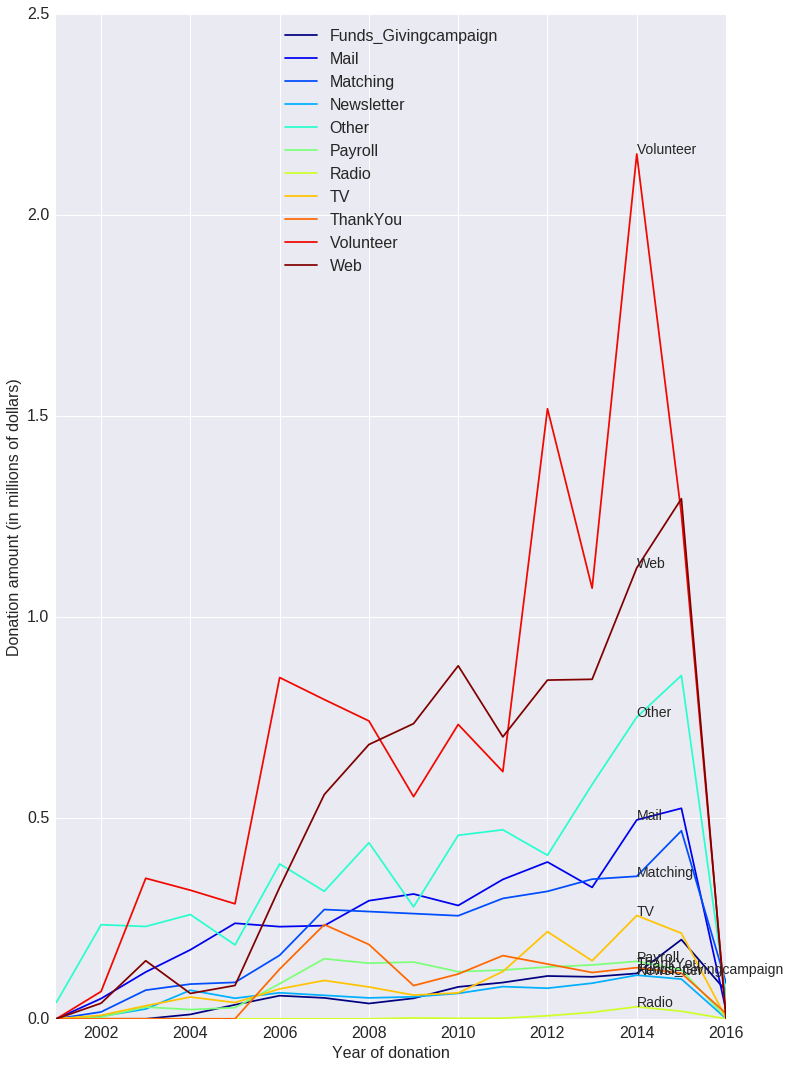

In [23]:
x = donations\
    .groupby(['activity_year', 'channel']).amount.sum().to_frame().unstack().fillna(0)
x.columns = x.columns.droplevel(0)

x = x/1000000

plot = x.plot(kind='line', colormap=plt.cm.jet,
              fontsize=12,
              figsize=(12,18),
              )

#plt.legend().set_visible(False)
plt.legend(prop={'size':16}, loc='upper center')
#plot.set_title('Donations flowing through different marketing channels',fontsize=16)
plt.xlabel('Year of donation', fontsize=16)
plt.ylabel('Donation amount (in millions of dollars)', fontsize=16)
plt.tick_params(labelsize=16)

for idx, x_value in enumerate(x[x.index==2014].values[0]):
    plt.text(2014, x_value, x.columns[idx], fontsize=14)
plt.savefig('viz/DonationsFromDifferentMarketingChannels.png')

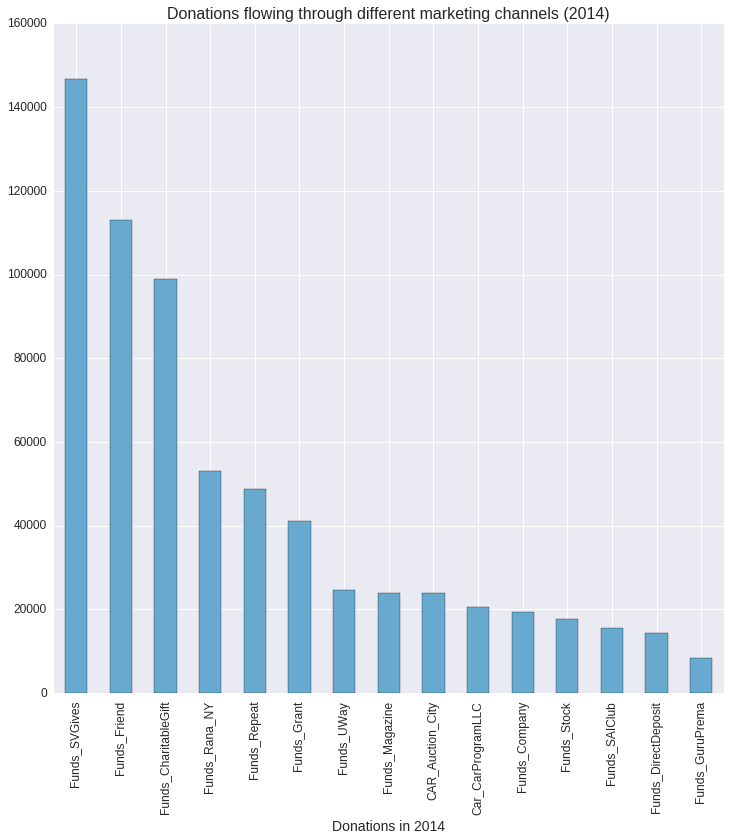

In [24]:
x = donations[(donations.activity_year==2014) & (donations.channel=='Other')]\
    .groupby(['appeal']).amount.sum().to_frame().unstack().fillna(0).sort_values(ascending=False)[:15].to_frame()
x.index = x.index.droplevel(0)
x.columns = ['Total Donation Amount']

plot = x.plot(kind='bar',
              fontsize=12,
              color=color1,
              figsize=(12,12))

plt.legend().set_visible(False)
plot.set_title('Donations flowing through different marketing channels (2014)',fontsize=16)
plt.xlabel('Donations in 2014', fontsize=14)

plt.savefig('viz/OtherIn2014.png')

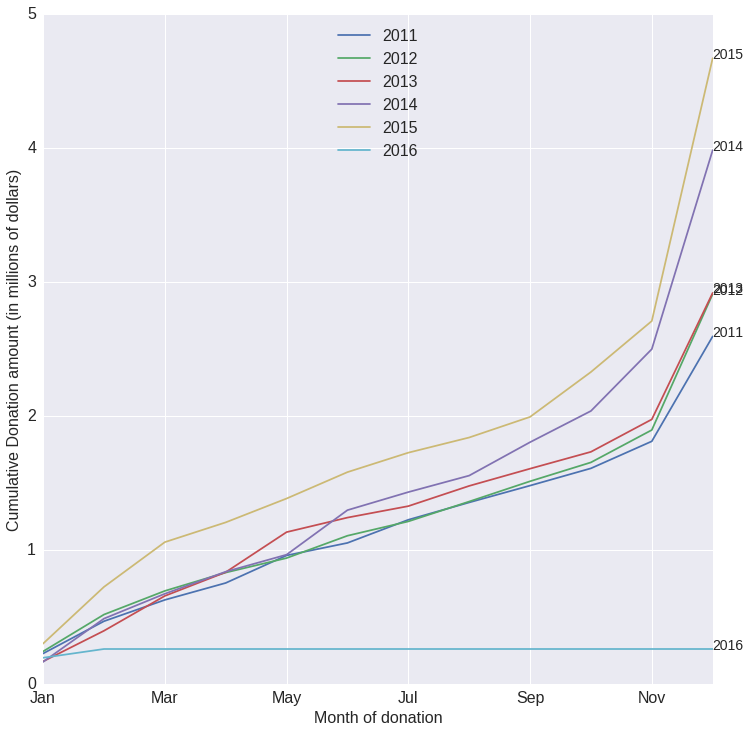

In [25]:
cumulative_years = np.cumsum(
    df[(df.activity_year > 2010) & (df.is_service==False)]\
        .groupby(['activity_year', 'activity_month'])['amount', ]\
        .sum()\
        .unstack()\
        .fillna(0)
    , axis=1, dtype='int64').T

cumulative_years.index = cumulative_years.index.droplevel(0)
cumulative_years.index = calendar.month_abbr[1:]
cumulative_years = cumulative_years/1000000

plot = cumulative_years.plot(kind='line',
              fontsize=12,
              figsize=(12,12))

plt.xlabel('Month of donation', fontsize=16)
plt.ylabel('Cumulative Donation amount (in millions of dollars)', fontsize=16)
plt.tick_params(labelsize=16)
#plot.set_title('Cumulative donation amounts over the years',fontsize=16)
plt.legend(prop={'size':16}, loc='upper center')

vals = cumulative_years.ffill(axis=0)[-1:].columns.values
heights = cumulative_years.ffill(axis=0)[-1:].values[0]

[plt.text(11, height, val, fontsize=14) for (val, height) in zip(vals, heights)]

plt.savefig('viz/CumulativeDonationsOverTheYears.png')

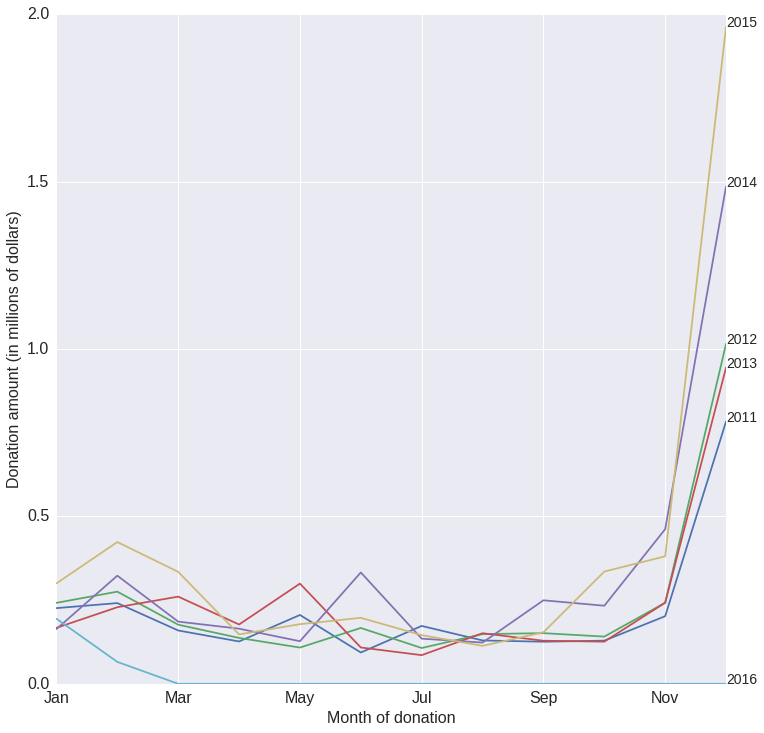

In [26]:
ymdata = df[(df.activity_year > 2010) & (df.is_service==False)].groupby(['activity_year', 'activity_month'])['amount', ]\
        .sum()\
        .unstack()\
        .fillna(0).T

ymdata.index = ymdata.index.droplevel(0)
ymdata.index = calendar.month_abbr[1:13]
ymdata = ymdata/1000000
plot = ymdata.plot(kind='line',
              fontsize=12,
              figsize=(12,12))

plt.xlabel('Month of donation', fontsize=16)
plt.ylabel('Donation amount (in millions of dollars)', fontsize=16)
#plot.set_title('Monthly donation amounts over the years',fontsize=16)

plt.legend().set_visible(False)
plt.tick_params(labelsize=16)

vals = ymdata.ffill(axis=0)[-1:].columns.values
heights = ymdata.ffill(axis=0)[-1:].values[0]

[plt.text(11, height, val, fontsize=14) for (val, height) in zip(vals, heights)]

plt.savefig('viz/DonationsOverTheYears.png')

### Churn of donors

In [27]:
donor_data.head()

,donor_id,activity_year,activity_month,is_service,state,amount,year_of_donation,year_of_contribution,is_repeat_year
0,-0Q51CZR36,2002,4,True,CA,100,0,1,NaN
1,-0Q51CZR36,2003,4,False,CA,100,1,1,False
2,-0Q51CZR37,2009,6,False,CA,100,1,1,False
3,-0Q51CZR37,2011,12,True,CA,192,1,1,NaN
4,-0Q51CZR3A,2002,4,False,CA,30,1,1,False


In [28]:
def get_churn(year):
    return len(set(
        donor_data[(donor_data.activity_year==year) & (donor_data.is_service==False)].donor_id.unique())\
.difference(set(donor_data[(donor_data.activity_year>year) & (donor_data.is_service==False)].donor_id.unique())))

In [29]:
churn = pd.Series(
    [-get_churn(year)
     for year
     in np.sort(donor_data.activity_year.unique()[:-1])],
    name='Churn',
    index=np.sort(donor_data.activity_year.unique()[:-1]))
new_donors = donor_data[donor_data.year_of_donation==1].groupby('activity_year').donor_id.nunique()[:-1]
new_donors.name = 'New'

# We drop the last row since it does not make sense to predict yearly churn until the year has passed
churn = churn.drop(churn.tail(1).index)
new_donors = new_donors.drop(new_donors.tail(1).index)

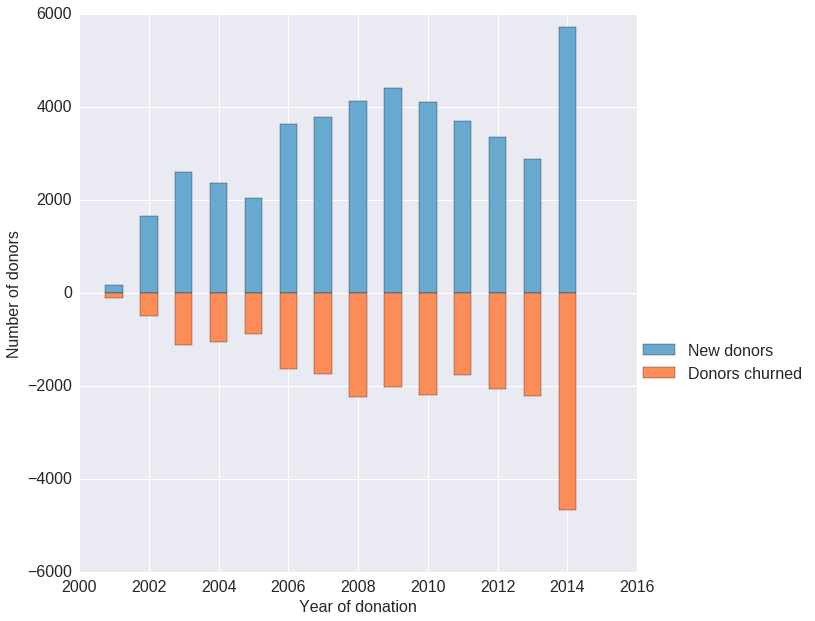

In [30]:
x = churn.index.values
fig = plt.figure(figsize=(10,10))
#plt.title('Churn vs New donors for every year', fontsize=16)
ax = plt.subplot(111)
ax.bar(x, new_donors, width=0.5, color=color1, align='center', label='New donors')
ax.bar(x, churn, width=0.5, color=color2, align='center', label='Donors churned')
plt.legend(prop={'size':16}, loc=(1,0.33))
plt.tick_params(labelsize=16)
plt.xlabel('Year of donation', fontsize=16)
plt.ylabel('Number of donors', fontsize=16)
plt.savefig('viz/ChurnVsNewDonors.png', bbox_inches='tight')

### How do fund-raisers impact donation dollars?

In [31]:
from itertools import cycle

def plot_event_donation_activity(state, years):

    ymdata = np.cumsum(
        donations[(donations.state==state)].groupby(['activity_year','activity_month'])['amount', ]\
        .sum()\
        .unstack()\
        .fillna(0),
        axis=1, dtype='int64')
        
    state_events = events[(events.state==state)][['event_name', 'amount', 'activity_month', 'activity_year']]\
    .sort_values(by=['activity_year', 'activity_month']).reset_index(drop=True)
    
    ymdata.columns = ymdata.columns.droplevel(0)
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Donation amount')

    vals = ymdata.index.values
    heights = ymdata.ffill(axis=1)[-1:].values[0]
    #[plt.text(12, height, val, fontsize=14) for (val, height) in zip(vals, heights)]

    ax2 = ax1.twinx()
    ax2.set_ylabel('Event contributions')

    colors = cycle(["r", "b", "g"])
    for year in years:
        color = next(colors)
        s1 = ymdata[ymdata.index==year].values[0]
        t = range(1,13)
        ax1.plot(t, s1, color=color, label=year)

        evs = state_events[state_events.activity_year==year]
        for ev in evs.iterrows():
            bar = ax2.bar(ev[1].activity_month, ev[1].amount, width=-0.4, alpha=0.2, color=color)
            label = ev[1].event_name
            
            # Put event_name on top of the bars
            rect = bar.patches[0]
            height = rect.get_height()
            ax2.text(rect.get_x() + rect.get_width()/2,
                     height + 5,
                     label,
                     ha='center',
                     va='bottom',
                     rotation='vertical',
                     fontsize=12)
    ax1.legend(prop={'size':16}, loc='upper left')
    plt.savefig('viz/Events_vs_Donations_{0}.png'.format(state))
    return ymdata

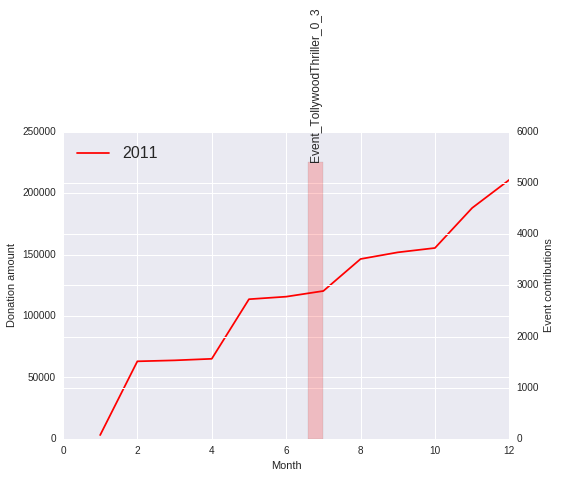

In [32]:
ymdata = plot_event_donation_activity('WA', [2011])

In [33]:
ymdata.ffill(axis=1)[:-1].index.values
ymdata.ffill(axis=1)[-1:].values[0]

array([ 34668.,  69668.,  69668.,  69668.,  69668.,  69668.,  69668.,
        69668.,  69668.,  69668.,  69668.,  69668.])

In [34]:
cumulative_years = np.cumsum(
    donations[(donations.activity_year > 2010)]\
        .groupby(['activity_year', 'activity_month'])['amount', ]\
        .sum()\
        .unstack()\
        .fillna(0)
    , axis=1, dtype='int64').T

In [35]:
cumulative_years

activity_year             2011     2012     2013     2014     2015    2016
       activity_month                                                     
amount 1                226118   243248   168113   166619   301428  197853
       2                468751   522459   423319   500769   725972  263313
       3                629122   701734   796153   818381  1061569  263313
       4                758609   838718  1196679  1369264  1260141  263313
       5                967830  1049314  1504959  2079289  1523394  263313
       6               1083650  1495743  1626509  2506993  1721833  263313
       7               1273327  1889078  1735911  2760165  1875409  263313
       8               1407957  2317517  1958031  2915759  1998612  263313
       9               1595126  2509647  2190192  3194623  2159074  263313
       10              1868432  2676412  2522388  3455292  2516113  263313
       11              2113211  3105017  2787510  4157809  2903283  263313
       12              3002270  4148449  3777531  5654555  5159704  263313